# **TRAINING MODEL**

[B21-CAP0409] Bangkit Capstone - Decision Support System for West Java Social Assistance using the SAW and K-Means Method

In [ ]:
!pip install ipython-autotime

%load_ext autotime

time: 2.5 ms (started: 2021-06-02 13:13:34 +00:00)


# Import Libraries

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.
time: 286 ms (started: 2021-06-02 13:13:34 +00:00)


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2
time: 4.04 s (started: 2021-06-02 13:13:34 +00:00)


In [ ]:
import os
import io
import random
import numpy as np
import pandas as pd 
import requests
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from random import choice, shuffle
from tensorflow import keras
from keras.layers import Input, Dense

time: 1.03 s (started: 2021-06-02 13:13:38 +00:00)


Using TensorFlow backend.


# Import Train Datasets

In [ ]:
#from local drive

from google.colab import files
uploaded = files.upload()

Saving train_datasetKependudukan.xlsx to train_datasetKependudukan.xlsx
time: 29.9 s (started: 2021-06-02 13:13:39 +00:00)


In [ ]:
penduduk_df = pd.read_excel(io.BytesIO(uploaded['train_datasetKependudukan.xlsx']))

time: 448 ms (started: 2021-06-02 13:14:09 +00:00)


In [ ]:
#from google colab file

#location = '/content/train_datasetKependudukan.xlsx'
#penduduk_df = pd.read_excel(location)

time: 1.28 ms (started: 2021-06-02 13:14:10 +00:00)


# Data Statistics

In [ ]:
penduduk_df

,nik,nama,tanggal_lahir,tanggungan_keluarga,pendidikan,profesi,status,gaji,kota_kabupaten,kecamatan,kelurahan,alamat,kondisi_kesehatan,atap,dinding,lantai,sumber_penerangan,sumber_air,luas_rumah,status_bansos
0,3204166610100000,RIMA MELA**,1980-01-29,1,0,17,0,3,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP WARG*****,2,1,0,3,0,0,3,NaN
1,3204166409100001,CUCU,1953-08-01,4,7,9,2,3,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP WARG*****,0,2,1,2,3,2,0,NaN
2,3204165010100002,USMI,1984-03-03,0,6,58,0,1,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP,0,2,2,3,0,1,0,rejected
3,3204164107100003,MIMI,1944-02-24,4,5,29,2,5,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP ANCO* RT 02 RW 04,2,0,3,3,0,0,0,NaN
4,3204165504100004,ETI ROHA***,1947-09-14,3,7,63,2,1,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP ANCO* RW 009 RT 002,2,2,2,3,2,1,1,rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,3204374207102785,ENTA*,1931-06-07,4,3,43,2,3,KAB.BANDUNG,SOREANG,SUKANAGARA,KP LEGO* HEAS RT 01 RW 05,0,1,1,3,2,0,3,NaN
2786,3204374311102786,RUSM****,1935-04-28,6,3,34,3,2,KAB.BANDUNG,SOREANG,SUKANAGARA,KP LEGO* HEAS RT 003 RW 004,0,0,2,0,2,1,1,NaN
2787,3204370605102787,CAHN*,1932-04-14,5,5,59,0,4,KAB.BANDUNG,SOREANG,SUKANAGARA,KP CIWA*** RT 05 RW 07,0,2,1,1,1,0,1,rejected
2788,3204375903102788,RISM* YANT*,1990-12-12,4,7,68,1,4,KAB.BANDUNG,SOREANG,SUKANAGARA,KP PASI* SALA* RT 005 RW 004,1,2,1,0,2,1,1,NaN


time: 50.3 ms (started: 2021-06-02 13:14:10 +00:00)


In [ ]:
penduduk_df.shape

(2790, 20)

time: 3.37 ms (started: 2021-06-02 13:14:10 +00:00)


In [ ]:
penduduk_df.columns

Index(['nik', 'nama', 'tanggal_lahir', 'tanggungan_keluarga', 'pendidikan',
       'profesi', 'status', 'gaji', 'kota_kabupaten', 'kecamatan', 'kelurahan',
       'alamat', 'kondisi_kesehatan', 'atap', 'dinding', 'lantai',
       'sumber_penerangan', 'sumber_air', 'luas_rumah', 'status_bansos'],
      dtype='object')

time: 4.27 ms (started: 2021-06-02 13:14:10 +00:00)


In [ ]:
penduduk_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nik,2790.0,3.210143e+15,3.252902e+14,100965.0,3.204150e+15,3.204285e+15,3.204355e+15,1.000000e+16
tanggungan_keluarga,2790.0,2.998208e+00,2.020599e+00,0.0,1.000000e+00,3.000000e+00,5.000000e+00,6.000000e+00
pendidikan,2790.0,3.467384e+00,2.274820e+00,0.0,1.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00
profesi,2790.0,4.520573e+01,2.536944e+01,1.0,2.300000e+01,4.500000e+01,6.800000e+01,8.800000e+01
status,2790.0,1.484229e+00,1.119725e+00,0.0,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
gaji,2790.0,2.436201e+00,1.708409e+00,0.0,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00
kondisi_kesehatan,2790.0,1.000358e+00,8.225488e-01,0.0,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00
atap,2790.0,9.928315e-01,8.205536e-01,0.0,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
dinding,2790.0,1.517921e+00,1.121613e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
lantai,2790.0,1.509677e+00,1.124587e+00,0.0,0.000000e+00,2.000000e+00,3.000000e+00,3.000000e+00


time: 64.6 ms (started: 2021-06-02 13:14:10 +00:00)


In [ ]:
penduduk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790 entries, 0 to 2789
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   nik                  2790 non-null   int64         
 1   nama                 2790 non-null   object        
 2   tanggal_lahir        2790 non-null   datetime64[ns]
 3   tanggungan_keluarga  2790 non-null   int64         
 4   pendidikan           2790 non-null   int64         
 5   profesi              2790 non-null   int64         
 6   status               2790 non-null   int64         
 7   gaji                 2790 non-null   int64         
 8   kota_kabupaten       2790 non-null   object        
 9   kecamatan            2790 non-null   object        
 10  kelurahan            2790 non-null   object        
 11  alamat               2762 non-null   object        
 12  kondisi_kesehatan    2790 non-null   int64         
 13  atap                 2790 non-nul

In [ ]:
# #check missing values computation
penduduk_df.isnull().sum()

nik                       0
nama                      0
tanggal_lahir             0
tanggungan_keluarga       0
pendidikan                0
profesi                   0
status                    0
gaji                      0
kota_kabupaten            0
kecamatan                 0
kelurahan                 0
alamat                   28
kondisi_kesehatan         0
atap                      0
dinding                   0
lantai                    0
sumber_penerangan         0
sumber_air                0
luas_rumah                0
status_bansos          2147
dtype: int64

time: 8.93 ms (started: 2021-06-02 13:14:10 +00:00)


# Features for Clustering

In [ ]:
#choose features for clustering (11 features)
features = ["tanggungan_keluarga", 
            "pendidikan", 
            "status", 
            "gaji", 
            "kondisi_kesehatan",
            "atap",
            "dinding",
            "lantai",
            "sumber_penerangan",
            "sumber_air",
            "luas_rumah"]

compute_df = penduduk_df.loc[(penduduk_df["status_bansos"] != 'rejected')]
tmp = features[:]
tmp.insert(0, "nik")
compute_df = compute_df[tmp]
compute_df = compute_df.astype(int)

features_df = compute_df[features]
features_df.columns

Index(['tanggungan_keluarga', 'pendidikan', 'status', 'gaji',
       'kondisi_kesehatan', 'atap', 'dinding', 'lantai', 'sumber_penerangan',
       'sumber_air', 'luas_rumah'],
      dtype='object')

time: 17.5 ms (started: 2021-06-02 13:14:10 +00:00)


In [ ]:
features_df

,tanggungan_keluarga,pendidikan,status,gaji,kondisi_kesehatan,atap,dinding,lantai,sumber_penerangan,sumber_air,luas_rumah
0,1,0,0,3,2,1,0,3,0,0,3
1,4,7,2,3,0,2,1,2,3,2,0
3,4,5,2,5,2,0,3,3,0,0,0
6,0,1,2,5,1,1,1,2,2,1,1
7,6,4,0,2,0,1,3,3,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
2782,1,6,0,2,2,1,1,1,0,1,2
2785,4,3,2,3,0,1,1,3,2,0,3
2786,6,3,3,2,0,0,2,0,2,1,1
2788,4,7,1,4,1,2,1,0,2,1,1


time: 25.7 ms (started: 2021-06-02 13:14:10 +00:00)


# Build a Model

## Elbow Methods

to find out K for K-Means so that we can decide the optimum cluster number

In [ ]:
wcss=[]

time: 1.35 ms (started: 2021-06-02 13:14:10 +00:00)


In [ ]:
for i in range(4,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(features_df)
    wcss.append(kmeans.inertia_)

time: 1.61 s (started: 2021-06-02 13:14:10 +00:00)


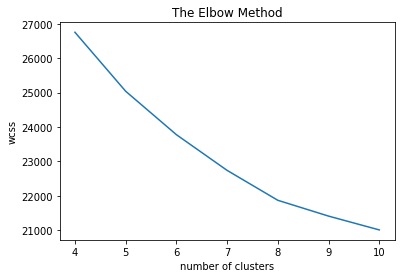

time: 300 ms (started: 2021-06-02 13:14:12 +00:00)


In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(4,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

## K-Mean Methods

In [ ]:
#to initialize and determine the starting centroids of the clusters
#so if the k-mean code re-run again, it won't change the staring centroids
tf.compat.v1.random.set_random_seed(1234)

time: 6.63 ms (started: 2021-06-02 13:14:12 +00:00)


In [ ]:
#set training data
x_train = np.array(features_df.iloc[:, :], dtype='float32')

print(x_train)

[[1. 0. 0. ... 0. 0. 3.]
 [4. 7. 2. ... 3. 2. 0.]
 [4. 5. 2. ... 0. 0. 0.]
 ...
 [6. 3. 3. ... 2. 1. 1.]
 [4. 7. 1. ... 2. 1. 1.]
 [4. 1. 0. ... 0. 0. 2.]]
time: 4.28 ms (started: 2021-06-02 13:14:12 +00:00)


In [ ]:
def kmeans(x, n_features, n_clusters, n_max_steps=10000, early_stop=0.0):
  input = tf.constant(x, dtype=tf.float32)
  centroids = tf.Variable(tf.slice(tf.random.shuffle(input), [0, 0], [n_clusters, -1]))
  old_centroids = tf.Variable(tf.zeros([n_clusters, n_features]), dtype=tf.float32)
  centroid_distance = tf.Variable(tf.zeros([n_clusters, n_features]))
  expanded = tf.expand_dims(input, 0)
  expanded_centroids = tf.expand_dims(centroids, 1)

  #count distances
  distances = tf.reduce_sum(tf.square(tf.subtract(expanded, expanded_centroids)), 2)

  clusters = tf.argmin(distances, 0)

  means = tf.concat([tf.reduce_mean(
      tf.gather(input, tf.reshape(tf.where(tf.equal(clusters, c)), [1, -1])),
      reduction_indices = [1]) for c in range(n_clusters)], 0)
  
  save_old_centroids = tf.assign(old_centroids, centroids)

  #centroid updates
  update_centroids = tf.assign(centroids, means)
  init_op = tf.global_variables_initializer()

  #training parameters that required
  performance = tf.assign(centroid_distance, tf.subtract(centroids, old_centroids))
  check_stop = tf.reduce_sum(tf.abs(performance))

  with tf.Session() as sess:
    sess.run(init_op)
    for step in range(n_max_steps):
      sess.run(save_old_centroids)
      _, centroid_values, clusters_values = sess.run(
          [update_centroids, centroids, clusters])
      sess.run(check_stop)
      current_stop_coefficient = check_stop.eval()
      if current_stop_coefficient <= early_stop:
        break
  return centroid_values, clusters_values

time: 31.7 ms (started: 2021-06-02 13:14:12 +00:00)


In [ ]:
#clustering
centers, predicted_cluster = kmeans(x_train, len(x_train[0]), 8) #(x, n_features, n_clusters)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
time: 500 ms (started: 2021-06-02 13:14:12 +00:00)


In [ ]:
#centroids
print(centers)

[[1.5955414  1.5159236  1.4681529  4.         1.0127388  0.9522293
  1.5477707  1.589172   1.0350318  0.5254777  1.4490446 ]
 [4.9561405  1.6096492  1.4824561  4.004386   1.0219299  0.96929824
  1.4736842  1.5087719  0.9649123  0.53070176 1.5482457 ]
 [5.0572686  5.431718   1.5947137  0.9911894  0.9471366  0.97356826
  1.5066079  1.4713657  0.95594716 0.4581498  1.4713657 ]
 [4.4885716  1.4485714  1.4428571  0.9942857  0.9628571  1.0514286
  1.5028571  1.58       1.0628572  0.4857143  1.5542858 ]
 [0.96581197 1.5299145  1.517094   0.94871795 0.9529914  1.0555556
  1.4401709  1.5811965  1.0085471  0.47435898 1.5384616 ]
 [4.4425087  5.491289   1.4912893  3.9965158  0.9547038  1.0243902
  1.5121951  1.3658537  0.989547   0.43554008 1.5853659 ]
 [1.2226027  5.520548   1.4246576  0.9520548  0.99657536 1.1027397
  1.5102739  1.4075342  1.0273973  0.5273973  1.4965754 ]
 [0.95348835 5.5534883  1.4372092  3.9023256  1.1023256  0.95348835
  1.4883721  1.5395349  1.0790697  0.4883721  1.2790698

In [ ]:
#predicted cluster
print(predicted_cluster)

[0 5 5 ... 3 5 3]
time: 1.61 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
#input predicted cluster to dataframe
compute_df["cluster"] = predicted_cluster
compute_df["cluster"] = compute_df["cluster"].astype("category")

time: 8.53 ms (started: 2021-06-02 13:14:13 +00:00)


## SAW Methods

### Normalize Function

In [ ]:
#find the maximum value = column of matrix
def max_value_columns(matrix):
  max_column = []
  for i in range(len(matrix[0])):
    max_column.append(np.max(matrix[:,i]))
  
  return max_column

time: 3.43 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
def normalize_columns(matrix, max_col):
  normalize_matrix = matrix
  for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      normalize_matrix[i][j] = normalize_matrix[i][j] / max_col[j]

  return normalize_matrix

time: 3.92 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
# find the maximum value - row of matrix
def max_value_rows(matrix):
  max_row = []
  for i in range(len(matrix)):
    max_row.append(np.max(matrix[i]))
  
  return max_row

time: 3.24 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
def normalize_rows(matrix, max_row):
  normalize_matrix = matrix
  for i in range(len(matrix)):
    for j in range(len(matrix[0])):
      normalize_matrix[i][j] = normalize_matrix[i][j] / max_row[i]

  return normalize_matrix

time: 4.08 ms (started: 2021-06-02 13:14:13 +00:00)


### Multiply Features Function

In [ ]:
def result(matrix, weight):
  matrix_mul = []
  result = [0] * len(matrix)
  for i in range(len(matrix)):
    prod = [a * b for a, b in zip(matrix[i], weight)]
    matrix_mul.append(prod)

  for i in range(len(matrix_mul)):
    for j in range(len(matrix_mul[0])):
      result[i] += matrix_mul[i][j]

  return result

time: 8.51 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
def indexing(matrix, have_index=False, index=[]):
  if have_index==True:
    if len(index)==len(matrix):
      return [matrix, index]
    else:
      raise Exception("index salah")
  else:
    return [matrix, list(range(len(matrix)))]

time: 4.76 ms (started: 2021-06-02 13:14:13 +00:00)


### Ranking Function

In [ ]:
def ranking(data):
  sorted = data
  for i in range(len(data[0])):
    for j in range(i, len(data[0])):
      if sorted[0][i] < sorted[0][j]:
        sorted[0][i], sorted[0][j] = sorted[0][j], sorted[0][i]
        sorted[1][i], sorted[1][j] = sorted[1][j], sorted[1][i]
  
  return sorted

time: 7.61 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
def saw(matrix, weight, have_index=False, index=[]):
  max_column = max_value_columns(matrix)
  normal_matrix = normalize_columns(matrix, max_column)
  max_row = max_value_rows(normal_matrix)
  normal_matrix = normalize_rows(normal_matrix, max_row)

  res = result(matrix, weight)
  res = indexing(res, have_index, index)
  sorted_res = ranking(res)

  return sorted_res

time: 7.03 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
#Features Weight
weight = [0.15, 0.058, 0.15, 0.15, 0.15, 0.057, 0.057, 0.057, 0.057, 0.057, 0.057]
cluster_rank = saw(centers, weight)

time: 3.66 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:

print(cluster_rank)

[[0.922686050951481, 0.9144380860924722, 0.8339265663325787, 0.8324011666476726, 0.8153286480307581, 0.7873470212519169, 0.7270233708322049, 0.6798017095327378], [5, 1, 2, 7, 0, 3, 6, 4]]
time: 2.48 ms (started: 2021-06-02 13:14:13 +00:00)


### Grouping of Social Assistance Recipients

Assumption: 
- Government giving Rp 500.000.000 budget for social assistance
- Based on Peraturan Gubernur Jawa Barat No 55 Tahun 2020: each person can get Rp 500.000
- (Rp 350.000 - non-cash; Rp 150.000 - cash)
- So, there will be 1000 people who will get social assistance

notes: this scenario can be change as needed

In [ ]:
#Count how much person in each cluster
value_cluster = compute_df['cluster'].value_counts(sort=False)
print(value_cluster)

0    314
1    228
2    227
3    350
4    234
5    287
6    292
7    215
Name: cluster, dtype: int64
time: 5.13 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
def add_status_bansos(data, cluster_rank, person_per_cluster, budget=500000000, help_per_person=500000):
  n_person = int(budget / help_per_person)
  data['status_bansos'] = 'rejected'

  for i in range(len(cluster_rank[0])):
    #print(n_person)
    if person_per_cluster[cluster_rank[1][i]] <= n_person:
      data.loc[(data['cluster']==cluster_rank[1][i]), 'status_bansos'] = 'accepted'
      n_person -= person_per_cluster[cluster_rank[1][i]]
    else:
      remaining_cluster = data[(data['cluster']==cluster_rank[1][i])]
      tmp = remaining_cluster.values
      index = tmp[:,0] #NIK masukin ke index
      matrix = tmp[:, 1:len(tmp[0])-2]
      # matrix = np.delete(matrix, 0, 1) #ambil nilai 11 parameter
      person_rank = saw(matrix, weight, have_index=True, index=index)
      for j in range(n_person):
        data.loc[data['nik']==person_rank[1][j], 'status_bansos'] = 'accepted'
      break
    
  return data

time: 42.4 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
compute_df = add_status_bansos(compute_df, cluster_rank, value_cluster)

time: 96.3 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
compute_df.loc[(compute_df['status_bansos']=='accepted')]

,nik,tanggungan_keluarga,pendidikan,status,gaji,kondisi_kesehatan,atap,dinding,lantai,sumber_penerangan,sumber_air,luas_rumah,cluster,status_bansos
1,3204166409100001,4,7,2,3,0,2,1,2,3,2,0,5,accepted
3,3204164107100003,4,5,2,5,2,0,3,3,0,0,0,5,accepted
7,3204160708100007,6,4,0,2,0,1,3,3,1,0,3,2,accepted
13,3204164107100013,1,4,2,3,1,0,2,2,1,1,0,7,accepted
14,3204164808100014,2,5,1,3,0,2,0,2,0,0,1,7,accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,3204374101102777,2,1,3,5,2,0,3,2,1,1,3,0,accepted
2778,3204374708102778,4,3,0,4,2,1,1,3,1,1,0,1,accepted
2781,3204370610102781,5,4,1,3,0,0,1,0,0,1,0,5,accepted
2785,3204374207102785,4,3,2,3,0,1,1,3,2,0,3,1,accepted


time: 40.4 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
compute_df

,nik,tanggungan_keluarga,pendidikan,status,gaji,kondisi_kesehatan,atap,dinding,lantai,sumber_penerangan,sumber_air,luas_rumah,cluster,status_bansos
0,3204166610100000,1,0,0,3,2,1,0,3,0,0,3,0,rejected
1,3204166409100001,4,7,2,3,0,2,1,2,3,2,0,5,accepted
3,3204164107100003,4,5,2,5,2,0,3,3,0,0,0,5,accepted
6,3204164709100006,0,1,2,5,1,1,1,2,2,1,1,0,rejected
7,3204160708100007,6,4,0,2,0,1,3,3,1,0,3,2,accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,3204376011102782,1,6,0,2,2,1,1,1,0,1,2,6,rejected
2785,3204374207102785,4,3,2,3,0,1,1,3,2,0,3,1,accepted
2786,3204374311102786,6,3,3,2,0,0,2,0,2,1,1,3,rejected
2788,3204375903102788,4,7,1,4,1,2,1,0,2,1,1,5,accepted


time: 36.6 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
penduduk_df

,nik,nama,tanggal_lahir,tanggungan_keluarga,pendidikan,profesi,status,gaji,kota_kabupaten,kecamatan,kelurahan,alamat,kondisi_kesehatan,atap,dinding,lantai,sumber_penerangan,sumber_air,luas_rumah,status_bansos
0,3204166610100000,RIMA MELA**,1980-01-29,1,0,17,0,3,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP WARG*****,2,1,0,3,0,0,3,NaN
1,3204166409100001,CUCU,1953-08-01,4,7,9,2,3,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP WARG*****,0,2,1,2,3,2,0,NaN
2,3204165010100002,USMI,1984-03-03,0,6,58,0,1,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP,0,2,2,3,0,1,0,rejected
3,3204164107100003,MIMI,1944-02-24,4,5,29,2,5,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP ANCO* RT 02 RW 04,2,0,3,3,0,0,0,NaN
4,3204165504100004,ETI ROHA***,1947-09-14,3,7,63,2,1,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP ANCO* RW 009 RT 002,2,2,2,3,2,1,1,rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,3204374207102785,ENTA*,1931-06-07,4,3,43,2,3,KAB.BANDUNG,SOREANG,SUKANAGARA,KP LEGO* HEAS RT 01 RW 05,0,1,1,3,2,0,3,NaN
2786,3204374311102786,RUSM****,1935-04-28,6,3,34,3,2,KAB.BANDUNG,SOREANG,SUKANAGARA,KP LEGO* HEAS RT 003 RW 004,0,0,2,0,2,1,1,NaN
2787,3204370605102787,CAHN*,1932-04-14,5,5,59,0,4,KAB.BANDUNG,SOREANG,SUKANAGARA,KP CIWA*** RT 05 RW 07,0,2,1,1,1,0,1,rejected
2788,3204375903102788,RISM* YANT*,1990-12-12,4,7,68,1,4,KAB.BANDUNG,SOREANG,SUKANAGARA,KP PASI* SALA* RT 005 RW 004,1,2,1,0,2,1,1,NaN


time: 59.6 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
#send SAW result to the penduduk dataset
penduduk_df.loc[penduduk_df['nik'].isin(compute_df['nik']), ['status_bansos']] = compute_df[['status_bansos']].values

#make a new dataset consist of NIK and social assistance status
result_df = penduduk_df[['nik', 'status_bansos']].copy()

time: 10.2 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
penduduk_df

,nik,nama,tanggal_lahir,tanggungan_keluarga,pendidikan,profesi,status,gaji,kota_kabupaten,kecamatan,kelurahan,alamat,kondisi_kesehatan,atap,dinding,lantai,sumber_penerangan,sumber_air,luas_rumah,status_bansos
0,3204166610100000,RIMA MELA**,1980-01-29,1,0,17,0,3,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP WARG*****,2,1,0,3,0,0,3,rejected
1,3204166409100001,CUCU,1953-08-01,4,7,9,2,3,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP WARG*****,0,2,1,2,3,2,0,accepted
2,3204165010100002,USMI,1984-03-03,0,6,58,0,1,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP,0,2,2,3,0,1,0,rejected
3,3204164107100003,MIMI,1944-02-24,4,5,29,2,5,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP ANCO* RT 02 RW 04,2,0,3,3,0,0,0,accepted
4,3204165504100004,ETI ROHA***,1947-09-14,3,7,63,2,1,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP ANCO* RW 009 RT 002,2,2,2,3,2,1,1,rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2785,3204374207102785,ENTA*,1931-06-07,4,3,43,2,3,KAB.BANDUNG,SOREANG,SUKANAGARA,KP LEGO* HEAS RT 01 RW 05,0,1,1,3,2,0,3,accepted
2786,3204374311102786,RUSM****,1935-04-28,6,3,34,3,2,KAB.BANDUNG,SOREANG,SUKANAGARA,KP LEGO* HEAS RT 003 RW 004,0,0,2,0,2,1,1,rejected
2787,3204370605102787,CAHN*,1932-04-14,5,5,59,0,4,KAB.BANDUNG,SOREANG,SUKANAGARA,KP CIWA*** RT 05 RW 07,0,2,1,1,1,0,1,rejected
2788,3204375903102788,RISM* YANT*,1990-12-12,4,7,68,1,4,KAB.BANDUNG,SOREANG,SUKANAGARA,KP PASI* SALA* RT 005 RW 004,1,2,1,0,2,1,1,accepted


time: 46.3 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
compute_df

,nik,tanggungan_keluarga,pendidikan,status,gaji,kondisi_kesehatan,atap,dinding,lantai,sumber_penerangan,sumber_air,luas_rumah,cluster,status_bansos
0,3204166610100000,1,0,0,3,2,1,0,3,0,0,3,0,rejected
1,3204166409100001,4,7,2,3,0,2,1,2,3,2,0,5,accepted
3,3204164107100003,4,5,2,5,2,0,3,3,0,0,0,5,accepted
6,3204164709100006,0,1,2,5,1,1,1,2,2,1,1,0,rejected
7,3204160708100007,6,4,0,2,0,1,3,3,1,0,3,2,accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,3204376011102782,1,6,0,2,2,1,1,1,0,1,2,6,rejected
2785,3204374207102785,4,3,2,3,0,1,1,3,2,0,3,1,accepted
2786,3204374311102786,6,3,3,2,0,0,2,0,2,1,1,3,rejected
2788,3204375903102788,4,7,1,4,1,2,1,0,2,1,1,5,accepted


time: 34 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
result_df

,nik,status_bansos
0,3204166610100000,rejected
1,3204166409100001,accepted
2,3204165010100002,rejected
3,3204164107100003,accepted
4,3204165504100004,rejected
...,...,...
2785,3204374207102785,accepted
2786,3204374311102786,rejected
2787,3204370605102787,rejected
2788,3204375903102788,accepted


time: 15.3 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
#check accepted person
penduduk_df.loc[(penduduk_df['status_bansos']=='accepted')]

,nik,nama,tanggal_lahir,tanggungan_keluarga,pendidikan,profesi,status,gaji,kota_kabupaten,kecamatan,kelurahan,alamat,kondisi_kesehatan,atap,dinding,lantai,sumber_penerangan,sumber_air,luas_rumah,status_bansos
1,3204166409100001,CUCU,1953-08-01,4,7,9,2,3,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP WARG*****,0,2,1,2,3,2,0,accepted
3,3204164107100003,MIMI,1944-02-24,4,5,29,2,5,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP ANCO* RT 02 RW 04,2,0,3,3,0,0,0,accepted
7,3204160708100007,ACEN*,1967-10-09,6,4,45,0,2,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP PASI***** RT 04 RW 08,0,1,3,3,1,0,3,accepted
13,3204164107100013,IKAH,1954-04-16,1,4,66,2,3,KAB.BANDUNG,ARJASARI,ARJASARI,KP CIBI***** RW 009 RT 003,1,0,2,2,1,1,0,accepted
14,3204164808100014,UPIT KUST***,1942-04-10,2,5,24,1,3,KAB.BANDUNG,ARJASARI,ARJASARI,KP ARJA**** RW 008 RT 001,0,2,0,2,0,0,1,accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,3204374101102777,AAH,1923-04-20,2,1,11,3,5,KAB.BANDUNG,SOREANG,SUKAJADI,KP CIMO*** RT 02 RW 11,2,0,3,2,1,1,3,accepted
2778,3204374708102778,ONIH,1938-08-26,4,3,47,0,4,KAB.BANDUNG,SOREANG,SUKAJADI,KP CILE**** RT 03 RW 14,2,1,1,3,1,1,0,accepted
2781,3204370610102781,SOBI***,1938-08-19,5,4,13,1,3,KAB.BANDUNG,SOREANG,SUKANAGARA,KP LEGO* HEAS RT 001 RW 005,0,0,1,0,0,1,0,accepted
2785,3204374207102785,ENTA*,1931-06-07,4,3,43,2,3,KAB.BANDUNG,SOREANG,SUKANAGARA,KP LEGO* HEAS RT 01 RW 05,0,1,1,3,2,0,3,accepted


time: 62.6 ms (started: 2021-06-02 13:14:13 +00:00)


In [ ]:
#check rejected person
penduduk_df.loc[(penduduk_df['status_bansos']=='rejected')]

,nik,nama,tanggal_lahir,tanggungan_keluarga,pendidikan,profesi,status,gaji,kota_kabupaten,kecamatan,kelurahan,alamat,kondisi_kesehatan,atap,dinding,lantai,sumber_penerangan,sumber_air,luas_rumah,status_bansos
0,3204166610100000,RIMA MELA**,1980-01-29,1,0,17,0,3,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP WARG*****,2,1,0,3,0,0,3,rejected
2,3204165010100002,USMI,1984-03-03,0,6,58,0,1,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP,0,2,2,3,0,1,0,rejected
4,3204165504100004,ETI ROHA***,1947-09-14,3,7,63,2,1,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP ANCO* RW 009 RT 002,2,2,2,3,2,1,1,rejected
5,3204164406100005,EDAH,1984-05-05,0,1,61,1,2,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP PASI***** RT 02 RW 08,2,2,3,1,0,0,1,rejected
6,3204164709100006,ENGK**,2003-04-26,0,1,29,2,5,KAB.BANDUNG,ARJASARI,ANCOLMEKAR,KP ANCO* RW 009 RT 002,1,1,1,2,2,1,1,rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2783,3204375609102783,ATIK,1991-12-15,4,7,55,2,2,KAB.BANDUNG,SOREANG,SUKANAGARA,KP CIPE***** RT 01 RW 02,0,2,3,1,1,0,0,rejected
2784,3204374101102784,ENIN*,1923-11-25,5,3,49,2,4,KAB.BANDUNG,SOREANG,SUKANAGARA,KP CIPE***** RT 05 RW 02,1,2,4,0,3,2,3,rejected
2786,3204374311102786,RUSM****,1935-04-28,6,3,34,3,2,KAB.BANDUNG,SOREANG,SUKANAGARA,KP LEGO* HEAS RT 003 RW 004,0,0,2,0,2,1,1,rejected
2787,3204370605102787,CAHN*,1932-04-14,5,5,59,0,4,KAB.BANDUNG,SOREANG,SUKANAGARA,KP CIWA*** RT 05 RW 07,0,2,1,1,1,0,1,rejected


time: 52.1 ms (started: 2021-06-02 13:14:13 +00:00)


# Save Predicted Cluster

In [ ]:
#save NIK & social assistance status for API - to csv
result_df.to_csv('PenerimaBansos.csv', index=None)
#result_df.to_excel('PenerimaBansos.xlsx', index=None)

#save predicted social assistance recipients - to xlsx
penduduk_df.to_excel('HasilPenerimaBansos.xlsx', index=None)

time: 1.55 s (started: 2021-06-02 13:14:13 +00:00)
